# Assignment 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import numpy as np


Load datasets

In [2]:
# Load data
df_2003 = pd.read_csv(
    '/Users/mathiaskroismoller/Library/Mobile Documents/com~apple~CloudDocs/Documents/DTU/Kanditat/1. Semester /Social Data Analysis/Exercises/Lecture 1/Data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250204.csv',
    sep=',')  # sep = '\t'
df_2018 = pd.read_csv(
    '/Users/mathiaskroismoller/Library/Mobile Documents/com~apple~CloudDocs/Documents/DTU/Kanditat/1. Semester /Social Data Analysis/Exercises/Lecture 1/Data/Police_Department_Incident_Reports__2018_to_Present_20250204.csv',
    sep=',')  # sep = '\t'

Add "year" column to latest dataset

In [3]:
df_2003["year"] = df_2003["Date"].str.extract(r'(\d{4})$').astype(int)

## Merge datasets

First we investigate the categeories in the two datasets

In [4]:
# Print column names for both datasets
print("Columns in df1:")
print(df_2003.columns.tolist())

print("\nColumns in df2:")
print(df_2018.columns.tolist())

# Print unique categories for both datasets
print("\nUnique categories in df1:")
print(df_2003['Category'].unique())

print("\nUnique categories in df2:")
print(df_2018['Incident Category'].unique())

print("\nUnique subcategories in df2:")
print(df_2018['Incident Subcategory'].unique())

Columns in df1:
['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'location', 'SF Find Neighborhoods 2 2', 'Current Police Districts 2 2', 'Current Supervisor Districts 2 2', 'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2', 'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2', 'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2', 'DELETE - 2017 Fix It Zones 2 2', 'Civic Center Harm Reduction Project Boundary 2 2', 'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2', 'Fix It Zones as of 2018-02-07 2 2', 'CBD, BID and GBD Boundaries as of 2017 2 2', 'Areas of Vulnerability, 2016 2 2', 'Central Market/Tenderloin Boundary 2 2', 'Central Market/Tenderloin Boundary Polygon - Updated 2 2', 'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2', 'Neighborhoods 2', 'year']

Columns in df2:
['Incident Datetime', 'Incident Date', 'Incident Time', 'I

Now mergeing the datasets based on the catageries that seen to relate

In [5]:
import pandas as pd

# Load datasets
df1 = df_2003
df2 = df_2018

# Define column mapping
column_mapping = {
    'IncidntNum': 'IncidentNumber',
    'Incident Code': 'IncidentCode',
    'Category': 'Category',
    'Descript': 'Subcategory',  # Treats `Descript` in df1 as `Subcategory`
    'Date': 'Date',
    'Time': 'Time',
    'PdDistrict': 'PoliceDistrict',
    'Resolution': 'Resolution',
    'year': 'Year'
}

# Select and rename columns in df1
df1 = df1[list(column_mapping.keys())].rename(columns=column_mapping)

# Select and rename columns in df2
df2 = df2[['Incident Number', 'Incident Code', 'Incident Category', 'Incident Subcategory', 'Incident Date', 
           'Incident Time', 'Police District', 'Resolution', 'Incident Year']]
df2.columns = ['IncidentNumber', 'IncidentCode', 'Category', 'Subcategory', 'Date', 'Time', 'PoliceDistrict', 'Resolution', 'Year']

# Define the category mapping, using both category and subcategory
category_mapping = {
    "LARCENY/THEFT": {"Category": ["LARCENY THEFT"], "Subcategory": ["LARCENY THEFT - OTHER", "LARCENY - FROM VEHICLE", "LARCENY THEFT - BICYCLE", "LARCENY THEFT - SHOPLIFTING", "LARCENY THEFT - FROM BUILDING", "LARCENY THEFT - PICKPOCKET", "LARCENY - AUTO PARTS", "LARCENY THEFT - PURSE SNATCH"]},
    "VEHICLE THEFT": {"Category": ["MOTOR VEHICLE THEFT"], "Subcategory": ["MOTOR VEHICLE THEFT (ATTEMPTED)"]},
    "STOLEN PROPERTY": {"Category": ["STOLEN PROPERTY"], "Subcategory": []},
    "DRUG/NARCOTIC": {"Category": ["DRUG VIOLATION", "DRUG OFFENSE"], "Subcategory": []},
    "ASSAULT": {"Category": ["ASSAULT"], "Subcategory": ["SIMPLE ASSAULT", "AGGRAVATED ASSAULT"]},
    "ROBBERY": {"Category": ["ROBBERY"], "Subcategory": ["ROBBERY - CARJACKING", "ROBBERY - OTHER", "ROBBERY - COMMERCIAL", "ROBBERY - STREET", "ROBBERY - RESIDENTIAL"]},
    "BURGLARY": {"Category": ["BURGLARY"], "Subcategory": ["BURGLARY - OTHER", "BURGLARY - COMMERCIAL", "BURGLARY - RESIDENTIAL", "BURGLARY - HOT PROWL"]},
    "VANDALISM": {"Category": ["VANDALISM", "MALICIOUS MISCHIEF"], "Subcategory": []},
    "WEAPON LAWS": {"Category": ["WEAPONS CARRYING ETC", "WEAPONS OFFENSE", "WEAPONS OFFENCE"], "Subcategory": []},
    "SEX OFFENSES, FORCIBLE": {"Category": ["RAPE"], "Subcategory": ["RAPE - ATTEMPTED"]},
    "SEX OFFENSES, NON FORCIBLE": {"Category": ["SEX OFFENSE"], "Subcategory": []},
    "PROSTITUTION": {"Category": ["PROSTITUTION"], "Subcategory": []},
    "DRIVING UNDER THE INFLUENCE": {"Category": ["TRAFFIC VIOLATION ARREST"], "Subcategory": []},
    "KIDNAPPING": {"Category": ["KIDNAPPING"], "Subcategory": []},
    "EXTORTION": {"Category": ["EXTORTION-BLACKMAIL"], "Subcategory": []},
    "GAMBLING": {"Category": ["GAMBLING"], "Subcategory": []},
    "BRIBERY": {"Category": ["BRIBERY"], "Subcategory": []},
    "FRAUD/FINANCIAL CRIME": {"Category": ["FRAUD", "FORGERY AND COUNTERFEITING", "BAD CHECKS", "EMBEZZLEMENT"], "Subcategory": []},
    "LOITERING": {"Category": ["LOITERING"], "Subcategory": []},
    "DRUNKENNESS": {"Category": ["LIQUOR LAWS"], "Subcategory": ["LIQUOR LAW VIOLATION"]},
    "DISORDERLY CONDUCT": {"Category": ["DISORDERLY CONDUCT"], "Subcategory": []},
    "TRESPASS": {"Category": ["SUSPICIOUS OCC", "SUSPICIOUS"], "Subcategory": ["TRESPASS"]},
    "HOMICIDE": {"Category": ["HOMICIDE"], "Subcategory": ["MANSLAUGHTER", "HOMICIDE - EXCUSABLE"]},
    "SUICIDE": {"Category": ["SUICIDE"], "Subcategory": []},
    "MISSING PERSON": {"Category": ["MISSING PERSON"], "Subcategory": ["MISSING ADULT"]},
    "TRAFFIC INCIDENT": {"Category": ["TRAFFIC COLLISION"], "Subcategory": ["TRAFFIC COLLISION - HIT & RUN"]},
    "HUMAN TRAFFICKING": {"Category": ["HUMAN TRAFFICKING, COMMERCIAL SEX ACTS", "HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS", "HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE", "HUMAN TRAFFICKING, INVOLUNTARY SERVITUDE"], "Subcategory": []},
    "OFFENSES AGAINST FAMILY & CHILDREN": {"Category": ["OFFENCES AGAINST THE FAMILY AND CHILDREN"], "Subcategory": []},
    "OTHER OFFENSES": {"Category": ["OTHER OFFENSES", "OTHER", "OTHER MISCELLANEOUS", "CASE CLOSURE", "CIVIL SIDEWALKS"], "Subcategory": []},
    "NON-CRIMINAL": {"Category": ["NON-CRIMINAL"], "Subcategory": ["COURTESY REPORT"]},
}

# Function to clean and map categories
def map_category(row):
    category = row['Category'].upper().strip() if pd.notna(row['Category']) else ""
    subcategory = row['Subcategory'].upper().strip() if pd.notna(row['Subcategory']) else ""

    for target, mapping in category_mapping.items():
        if category in mapping["Category"] or subcategory in mapping["Subcategory"]:
            return target
    
    return category if category else "UNKNOWN"

# Apply category mapping to both datasets
df1['Category'] = df1.apply(map_category, axis=1)
df2['Category'] = df2.apply(map_category, axis=1)

# Ensure 'Date' is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

# Merge datasets
df = pd.concat([df1, df2], ignore_index=True)

/var/folders/z6/0dqw2m7n37l5vjqcv_822tdr0000gn/T/ipykernel_60403/3644793536.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Category'] = df2.apply(map_category, axis=1)
/var/folders/z6/0dqw2m7n37l5vjqcv_822tdr0000gn/T/ipykernel_60403/3644793536.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')


## Part 1
### Exercise 3: Temporal patterns.

To start off easily, let's count the number of crimes per year:

In [6]:
crime_counts_per_year = df["Year"].value_counts().sort_values(ascending=False)
print(crime_counts_per_year)


Year
2018    196640
2015    151459
2017    149487
2013    147664
2019    146714
2016    145994
2014    144844
2003    142803
2004    142054
2005    137048
2022    135658
2012    135464
2008    135242
2009    134309
2023    133072
2006    131856
2007    131771
2021    128348
2010    127758
2011    126713
2020    117503
2024    108307
2025      7572
Name: count, dtype: int64



Q: What is the year with most crimes?

A: 2018 had teh most crimes


Q: What is the year with the fewest crimes?.

A: 2025 obviously has had the fewest crimes so far... But for completed years, it is 2024 that has the lowest crime count. 


Create a barplot of crimes-per-year (years on the -axis, crime-counts on the -axis).

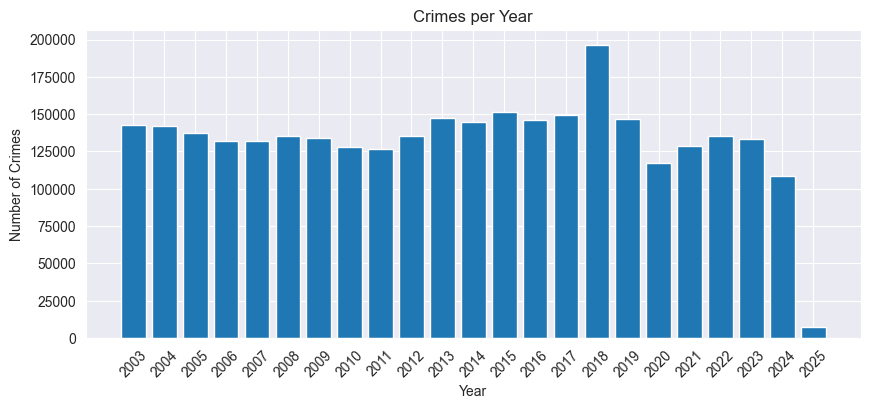

In [7]:
# Count occurrences of each year
yearly_counts = df['Year'].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(10, 4))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(ticks=yearly_counts.index, labels=yearly_counts.index, rotation=45)  
plt.title("Crimes per Year")
plt.show()


Finally, Police chief Suneman is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2025.

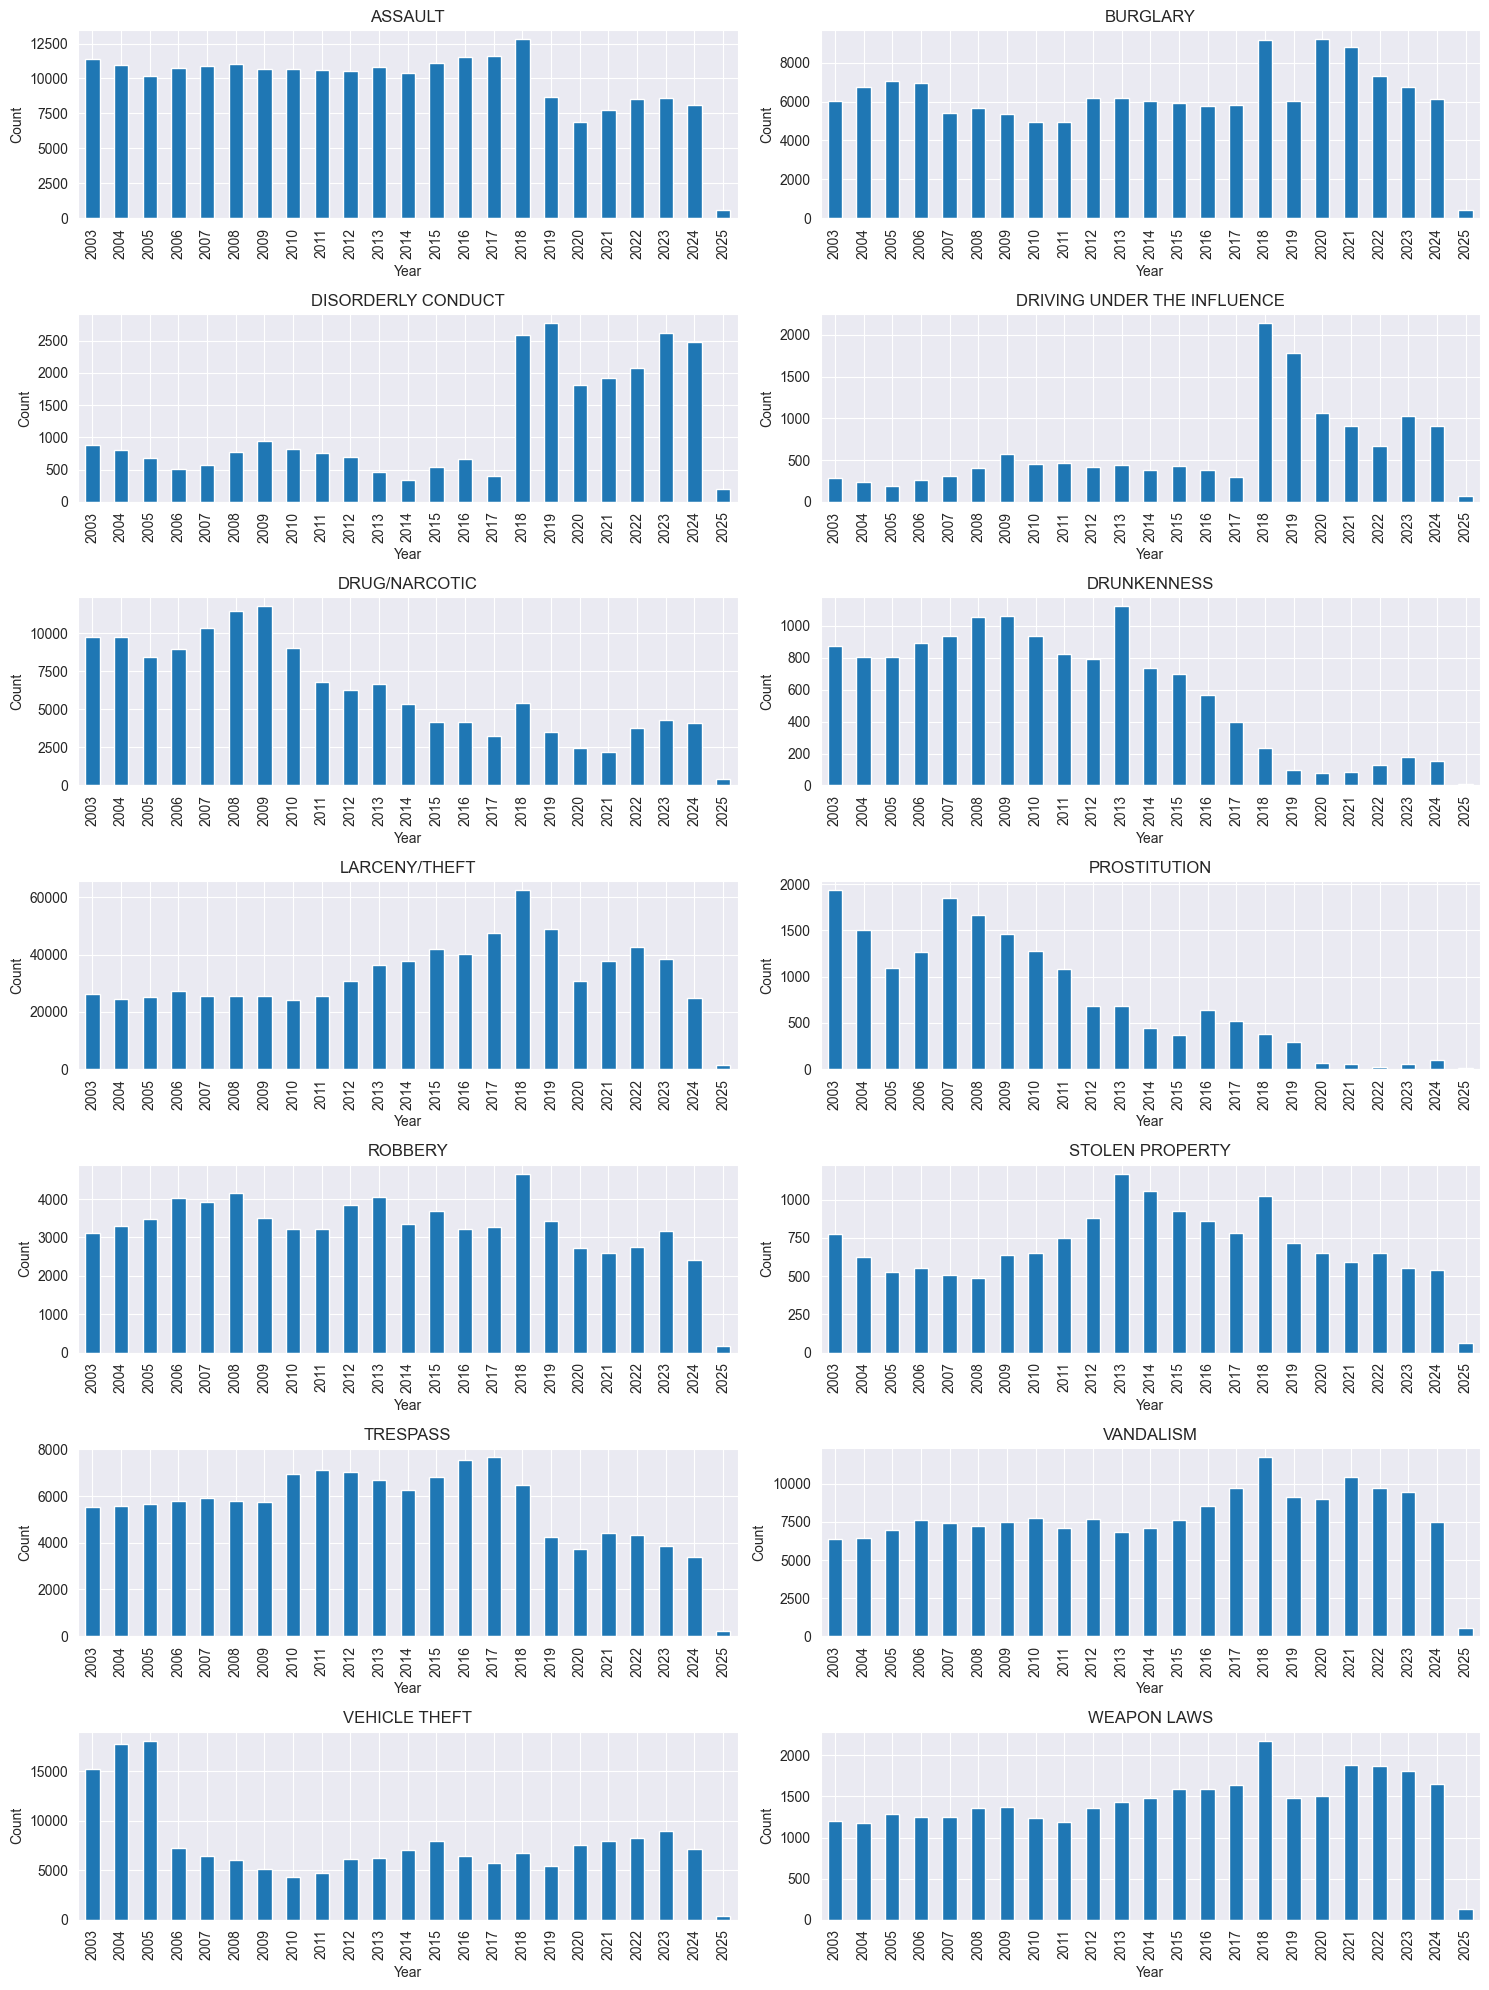

In [70]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])


# Filter dataset for focus crimes
df_focus = df[df['Category'].isin(focuscrimes)]

# Count crimes per year for each category
crime_counts = df_focus.groupby(['Category', 'Year']).size().unstack(fill_value=0)

# Set up subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))  # Adjust grid based on number of categories
axes = axes.flatten()

# Plot each crime category
for i, (crime, counts) in enumerate(crime_counts.iterrows()):
    ax = axes[i]
    counts.plot(kind='bar', ax=ax)
    ax.set_title(crime)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Part 2



### Questions for the lecture.
**Question 1:**  
What is the difference between data and metadata? How does that relate to the GPS tracks-example?
  
**Answer:**  
Data refers to the actual information collected, such as GPS coordinates, timestamps, and speed measurements. Metadata, on the other hand, provides information about the data, such as the format of the GPS logs, the device used to collect them, or the time zone. In the GPS tracks example, the raw locations are data, while details like the sampling rate and coordinate system are metadata.

**Question 2:** 
Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.  

**Answer:**  
Yes, the human eye is great for recognizing patterns, anomalies, and trends in visual data, such as graphs or heatmaps. It excels at identifying outliers and clustering in scatter plots. However, it struggles with precise numerical comparisons, such as detecting small statistical differences in large datasets. This is because the eye lacks the ability to process large quantities of raw numerical data efficiently.

**Question 3:** 
Simpson's paradox is hard to explain. Come up with your own example - or find one online.  

**Answer:**  
Consider a university where two departments (A and B) evaluate admission rates for male and female applicants. Individually, both departments admit a higher percentage of female applicants than male applicants. However, when combined, the overall admission rate for males is higher. This happens because more female applicants applied to the more competitive department, skewing the overall numbers.

**Question 4:** 
In your own words, explain the difference between exploratory and explanatory data analysis.  

**Answer:**  
Exploratory data analysis (EDA) focuses on discovering patterns, trends, and relationships within the data, often using visualizations and statistical summaries. It is open-ended and helps generate hypotheses. Explanatory data analysis (EDA) presents findings clearly and concisely to communicate insights, often using graphs, tables, and narratives tailored to an audience. The key difference is that exploratory analysis is about discovery, while explanatory analysis is about communication.


### 10 Rules for Making Nice Plots

1. **Crop to have a tight layout**  
Avoid unnecessary whitespace to keep the focus on the data. Use tools like `plt.tight_layout()` in Matplotlib.

2. **Subplots with comparable data**  
When using subplots, ensure they present similar types of data to allow for meaningful comparisons.

3. **Subplots should use the same axis**  
Use the same scale and range for axes across subplots to avoid misleading comparisons.

4. **Labels and legends**  
Always label axes and include legends when necessary to clarify what the data represents.

5. **X-axis: use meaningful values**  
Choose scales and units that are intuitive and relatable.

6. **Y-axis: use the full zoom range**  
Avoid artificially zooming in on differences that exaggerate trends. Show the true scale of the data.

7. **Less is more**  
Keep plots simple. Avoid unnecessary gridlines, decorations, or too many colors that distract from the data.

8. **Easy-to-read fonts**  
Use clear, legible fonts with appropriate sizes to ensure readability.

9. **Good captions**  
Provide concise yet informative captions to explain key insights in the plot.

10. **Consistency matters**  
Use the same style, colors, and formats across multiple plots to maintain clarity and coherence.


## Part 3

### Calendar Heatmap (Crime Frequency by Date)

/var/folders/z6/0dqw2m7n37l5vjqcv_822tdr0000gn/T/ipykernel_60403/485258576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month_day'] = df_filtered['Date'].dt.strftime('%m-%d')


(<Figure size 1600x300 with 2 Axes>,
 array([<Axes: ylabel='2040'>], dtype=object))

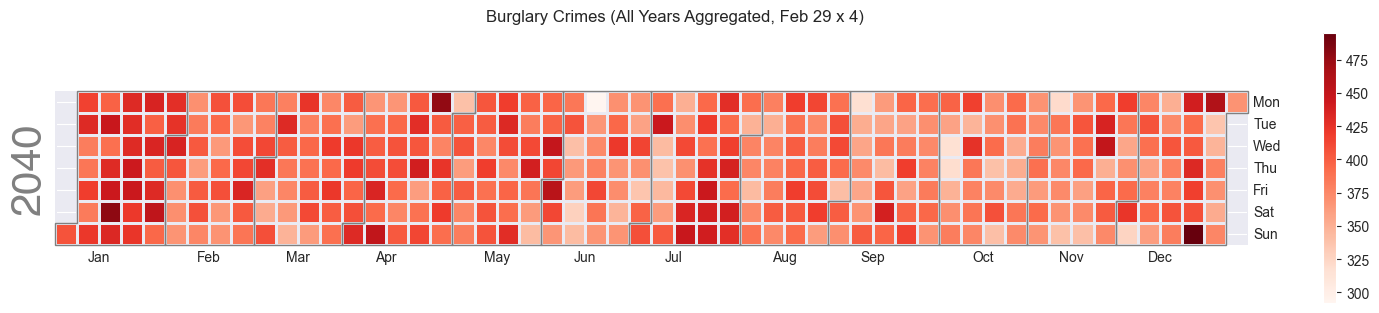

In [127]:
import pandas as pd
import calplot

# 1. Convert date column to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# 2. (Optional) Filter DataFrame for a specific crime type, e.g. "burglary"
df_filtered = df[df['Category'] == 'BURGLARY']

# 3. Collapse multiple years into (month-day)
df_filtered['month_day'] = df_filtered['Date'].dt.strftime('%m-%d')

# 4. Aggregate crime counts by month_day
crime_counts = (
    df_filtered
    .groupby('month_day')
    .size()                # or .agg(...) for other stats
    .rename('crime_count')
)

# 5. Multiply Feb 29 by 4 (only if it exists)
if '02-29' in crime_counts.index:
    crime_counts.loc['02-29'] *= 4

# 6. Create a "fake year" date range, including Feb 29 if you want it in the heatmap
fake_year = 2040   # 2020 is a leap year, so it includes 02-29
all_days = pd.date_range(
    start=f'{fake_year}-01-01', 
    end=f'{fake_year}-12-31', 
    freq='D'
)

# 7. Build a DataFrame for that fake year
fake_df = pd.DataFrame(index=all_days)
fake_df.index.name = 'date'
fake_df['month_day'] = fake_df.index.strftime('%m-%d')

# 8. Merge crime counts onto the fake year DataFrame
fake_df = fake_df.reset_index().merge(crime_counts, on='month_day', how='left')

# 9. Re-set the index, fill missing values with 0
fake_df.set_index('date', inplace=True)
fake_df['crime_count'].fillna(0, inplace=True)

# 10. Plot with calplot, horizontal colorbar
calplot.calplot(
    data=fake_df['crime_count'],
    cmap='Reds',
    colorbar=True,
    suptitle='Burglary Crimes (All Years Aggregated, Feb 29 x 4)',
    figsize=(16, 3)
)


### Polar Bar Chart (Crime Patterns Over 24 Hours)

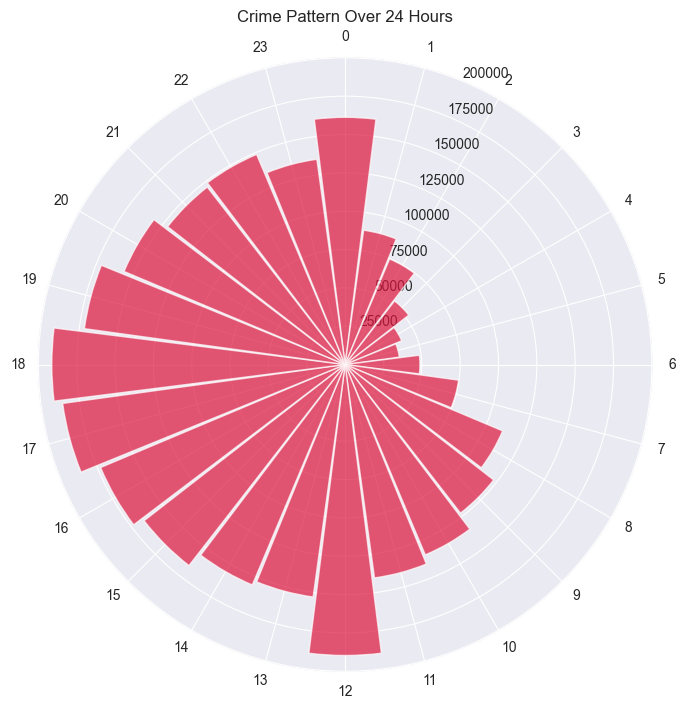

In [81]:
# Load the merged dataset
df_copy = df.copy()

# Convert Time to datetime format
df_copy['Hour'] = pd.to_datetime(df_copy['Time'], format='%H:%M', errors='coerce').dt.hour

# Count crimes per hour
hourly_crime = df_copy['Hour'].value_counts().sort_index()

# Convert to radians for polar plot
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)
values = hourly_crime.reindex(range(24), fill_value=0).values

# Create polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.bar(theta, values, width=0.25, bottom=0, color='crimson', alpha=0.7)

# Labels and title
ax.set_xticks(theta)
ax.set_xticklabels(range(24))
ax.set_title("Crime Pattern Over 24 Hours")
plt.show()


## Part 4

## Part 5